##**Telecom X 2**

Eliminacion de Columnas


In [1]:
import pandas as pd

# Importar el archivo CSV
df = pd.read_csv('datos_tratados.csv')

# Mostrar información inicial del dataset
print("Información inicial del dataset:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\nPrimeras 5 filas:")
print(df.head())

# Eliminar columnas que no aportan valor al análisis
columnas_a_eliminar = ['customerID', 'Cuentas_Diarias']  # ID único y columna derivada
df_clean = df.drop(columns=columnas_a_eliminar)

# Verificar la eliminación
print("\nDataset después de eliminar columnas no relevantes:")
print(f"Filas: {df_clean.shape[0]}, Columnas: {df_clean.shape[1]}")
print("\nNombres de columnas restantes:")
print(df_clean.columns.tolist())

# Mostrar información del dataset limpio
print("\nInformación del dataset limpio:")
print(df_clean.info())

Información inicial del dataset:
Filas: 7267, Columnas: 23

Primeras 5 filas:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-orfbo    no          female                       0              yes   
1  0003-mknfe    no            male                       0               no   
2  0004-tlhlj    si            male                       0               no   
3  0011-igkff    si            male                       1              yes   
4  0013-exchz    si          female                       1              yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 yes                9                yes                  no   
1                  no                9                yes                 yes   
2                  no                4                yes                  no   
3                  no               13                yes                  no   
4                  no               

##**Encoding**

In [3]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identificar columnas categóricas
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Mostrar columnas categóricas identificadas
print("Columnas categóricas identificadas:")
print(categorical_cols)

# Separar la variable objetivo 'Churn' ya que requiere tratamiento especial
target_col = 'Churn'
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

    # Convertir target a numérico (si/no a 1/0)
    df_clean[target_col] = df_clean[target_col].map({'si': 1, 'no': 0})

# One-Hot Encoding para las demás variables categóricas
encoder = OneHotEncoder(drop='first') # Removed sparse=False
encoded_data = encoder.fit_transform(df_clean[categorical_cols]).toarray() # Convert to dense array

# Crear DataFrame con las nuevas columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combinar con las columnas numéricas originales
numeric_cols = [col for col in df_clean.columns if col not in categorical_cols + [target_col]]
final_df = pd.concat([
    df_clean[numeric_cols + [target_col]].reset_index(drop=True),
    encoded_df
], axis=1)

# Mostrar resultados
print("\nDataset después de la transformación:")
print(f"Filas: {final_df.shape[0]}, Columnas: {final_df.shape[1]}")
print("\nPrimeras 5 filas:")
print(final_df.head())
print("\nResumen de nuevas columnas creadas:")
print(final_df.columns.tolist())

Columnas categóricas identificadas:
['customer_gender', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']

Dataset después de la transformación:
Filas: 7267, Columnas: 32

Primeras 5 filas:
   customer_SeniorCitizen  customer_tenure  account_Charges_Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account_Charges_Total  MonthlyCharges  Churn  customer_gender_male  \
0             

In [5]:
# Calculate the proportion of churned and non-churned customers
churn_counts = final_df['Churn'].value_counts()
churn_proportions = final_df['Churn'].value_counts(normalize=True) * 100

print("Proporción de clientes que cancelaron (Churn) vs. los que no cancelaron:")
print(churn_counts)
print("\nPorcentaje:")
print(churn_proportions)

# Assess class imbalance
if churn_proportions[1] < 25: # Assuming '1' represents churn
    print("\nExiste un desbalance significativo en las clases.")
else:
    print("\nEl desbalance de clases no es significativo.")

Proporción de clientes que cancelaron (Churn) vs. los que no cancelaron:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Porcentaje:
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

El desbalance de clases no es significativo.


In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numerical columns that are not the target variable
numerical_cols = final_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_col = 'Churn' # Assuming 'Churn' is the target variable and is already numerical

if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print("Numerical columns to scale:")
print(numerical_cols)

# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(final_df[numerical_cols])

# Create a DataFrame from the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

# Combine the scaled numerical columns with the rest of the DataFrame
# First, drop the original numerical columns from the final_df
df_other_cols = final_df.drop(columns=numerical_cols)

# Concatenate the scaled numerical DataFrame with the rest of the columns
final_df_scaled = pd.concat([df_other_cols.reset_index(drop=True), scaled_numerical_df], axis=1)

print("\nDataset after scaling numerical columns:")
print(final_df_scaled.head())

Numerical columns to scale:
['customer_SeniorCitizen', 'customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'MonthlyCharges', 'customer_gender_male', 'customer_Partner_yes', 'customer_Dependents_yes', 'phone_PhoneService_yes', 'phone_MultipleLines_no phone service', 'phone_MultipleLines_yes', 'internet_InternetService_fiber optic', 'internet_InternetService_no', 'internet_OnlineSecurity_no internet service', 'internet_OnlineSecurity_yes', 'internet_OnlineBackup_no internet service', 'internet_OnlineBackup_yes', 'internet_DeviceProtection_no internet service', 'internet_DeviceProtection_yes', 'internet_TechSupport_no internet service', 'internet_TechSupport_yes', 'internet_StreamingTV_no internet service', 'internet_StreamingTV_yes', 'internet_StreamingMovies_no internet service', 'internet_StreamingMovies_yes', 'account_Contract_one year', 'account_Contract_two year', 'account_PaperlessBilling_yes', 'account_PaymentMethod_credit card (automatic)', 'account_PaymentMeth

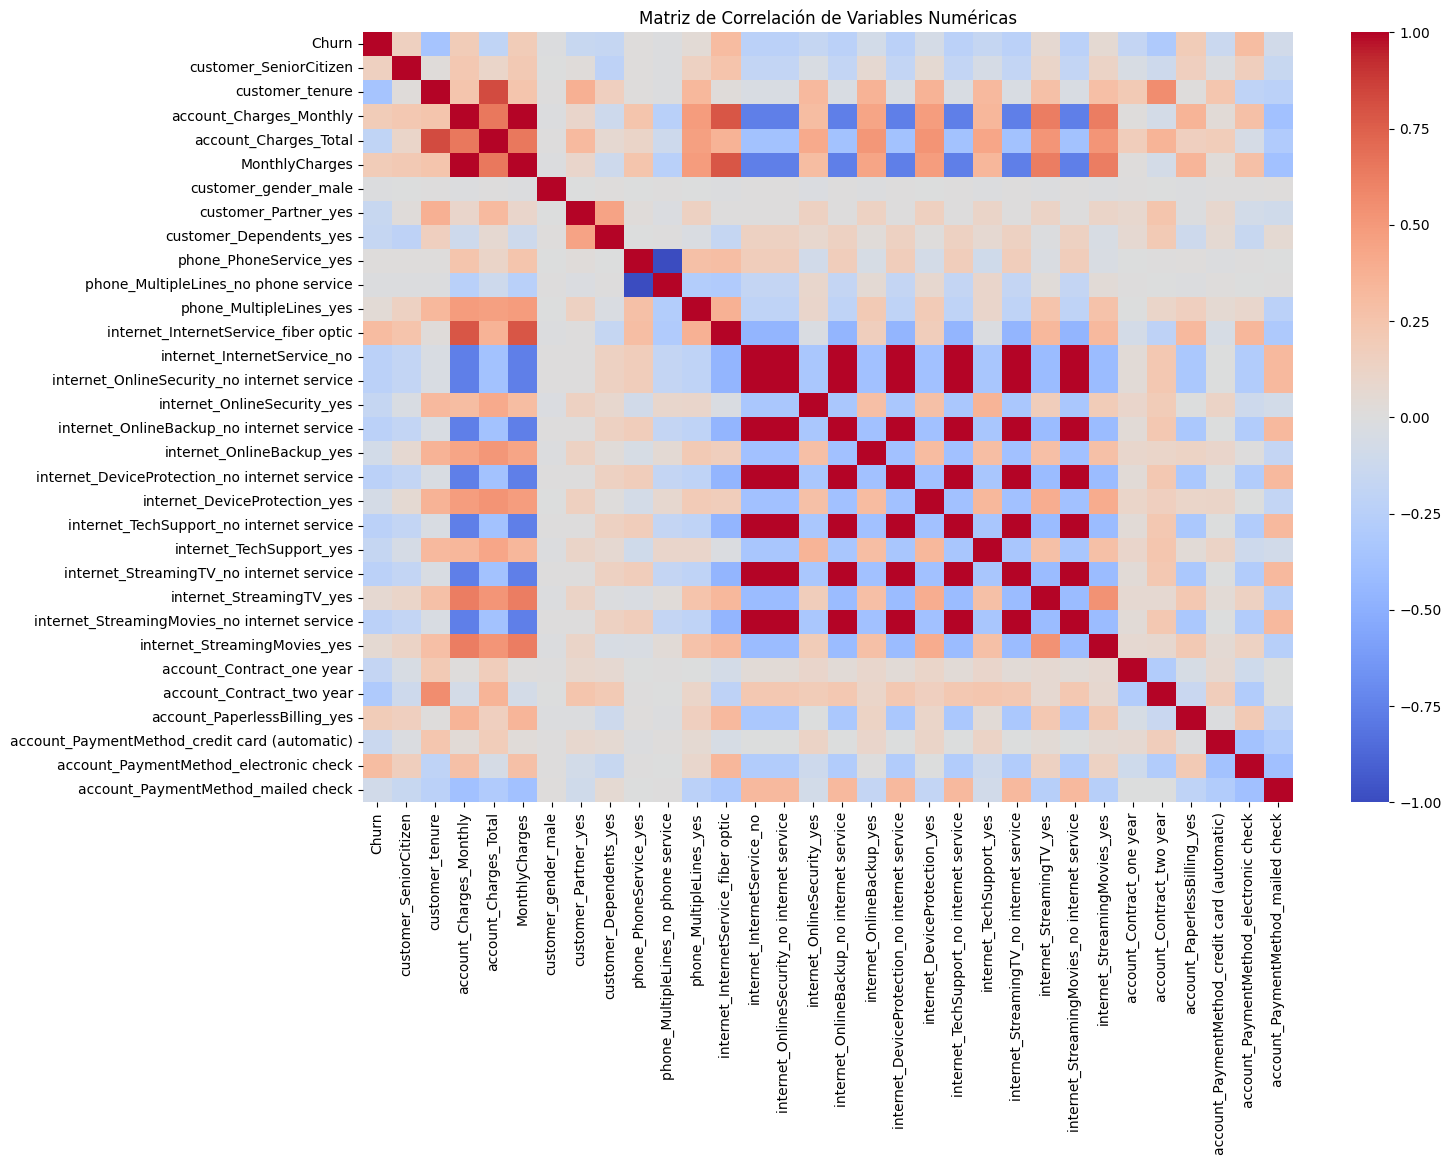


Correlación con la variable 'Churn':
Churn                                            1.000000
internet_InternetService_fiber optic             0.308020
account_PaymentMethod_electronic check           0.301919
account_Charges_Monthly                          0.193356
account_PaperlessBilling_yes                     0.191825
MonthlyCharges                                   0.191804
customer_SeniorCitizen                           0.150889
internet_StreamingTV_yes                         0.063228
internet_StreamingMovies_yes                     0.061382
phone_MultipleLines_yes                          0.040102
phone_PhoneService_yes                           0.011942
customer_gender_male                            -0.008612
phone_MultipleLines_no phone service            -0.011942
internet_DeviceProtection_yes                   -0.066160
internet_OnlineBackup_yes                       -0.082255
account_PaymentMethod_mailed check              -0.091683
account_PaymentMethod_credit card 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = final_df_scaled.corr()

# Visualizar la matriz de correlación (heatmap)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Mostrar correlaciones con la variable objetivo 'Churn'
print("\nCorrelación con la variable 'Churn':")
print(correlation_matrix['Churn'].sort_values(ascending=False))

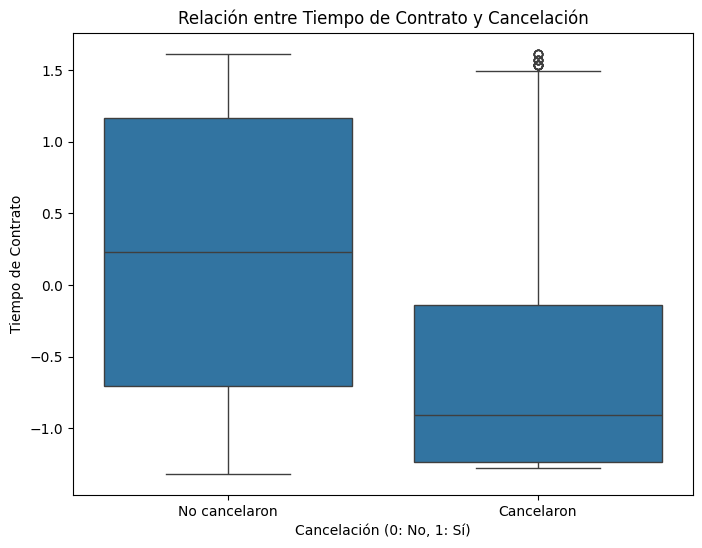

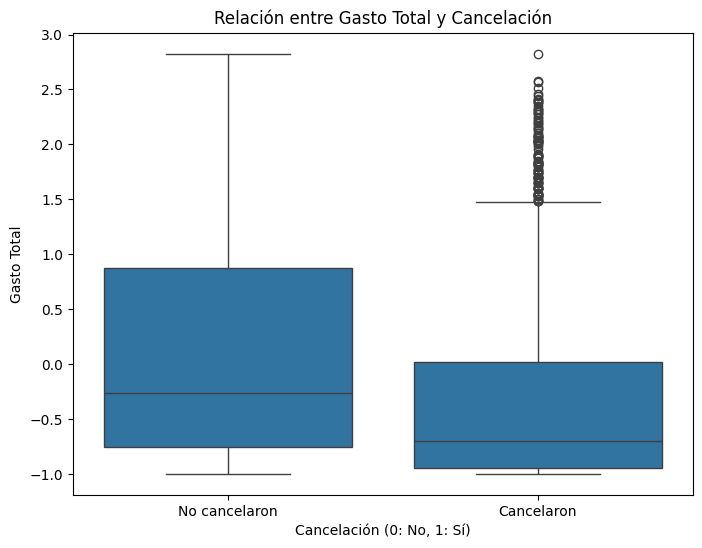

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la relación entre 'customer_tenure' (Tiempo de contrato) y 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=final_df_scaled)
plt.title('Relación entre Tiempo de Contrato y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato')
plt.xticks([0, 1], ['No cancelaron', 'Cancelaron'])
plt.show()

# Visualizar la relación entre 'account_Charges_Total' (Gasto total) y 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges_Total', data=final_df_scaled)
plt.title('Relación entre Gasto Total y Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.xticks([0, 1], ['No cancelaron', 'Cancelaron'])
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas if not already imported

# Eliminar filas con valores faltantes en la variable objetivo 'Churn'
df_cleaned_split = final_df_scaled.dropna(subset=['Churn'])

# Separar las características (X) y la variable objetivo (y) del DataFrame limpio
X = df_cleaned_split.drop('Churn', axis=1)
y = df_cleaned_split['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train, y_train): (5634, 31) (5634,)
Dimensiones del conjunto de prueba (X_test, y_test): (1409, 31) (1409,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelo de Regresión Logística (requiere datos escalados)
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Modelo de Random Forest (no requiere datos escalados)
# Usaremos los datos escalados ya que es el DataFrame actual, pero este modelo no es sensible a la escala
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Modelos entrenados.")

Modelos entrenados.


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación del Modelo de Regresión Logística
y_pred_log_reg = log_reg_model.predict(X_test)

print("Evaluación del Modelo de Regresión Logística:")
print("Exactitud:", accuracy_score(y_test, y_pred_log_reg))
print("Precisión:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log_reg))

print("-" * 30)

# Evaluación del Modelo de Random Forest
y_pred_rf = rf_model.predict(X_test)

print("Evaluación del Modelo de Random Forest:")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

Evaluación del Modelo de Regresión Logística:
Exactitud: 0.794180269694819
Precisión: 0.6372549019607843
Recall: 0.5213903743315508
F1-score: 0.5735294117647058
Matriz de Confusión:
 [[924 111]
 [179 195]]
------------------------------
Evaluación del Modelo de Random Forest:
Exactitud: 0.7885024840312278
Precisión: 0.6376811594202898
Recall: 0.47058823529411764
F1-score: 0.5415384615384615
Matriz de Confusión:
 [[935 100]
 [198 176]]


In [20]:
# Variables más relevantes para Regresión Logística
# Los coeficientes indican la fuerza y dirección de la relación con la variable objetivo (Churn)
log_reg_coefficients = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': log_reg_model.coef_[0]
})
log_reg_coefficients = log_reg_coefficients.sort_values(by='Coeficiente', ascending=False)

print("Variables más relevantes (Regresión Logística):")
print(log_reg_coefficients)

print("-" * 30)

# Variables más relevantes para Random Forest
# La importancia de la característica indica cuánto contribuye cada variable a la reducción de la impureza
rf_feature_importances = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf_model.feature_importances_
})
rf_feature_importances = rf_feature_importances.sort_values(by='Importancia', ascending=False)

print("Variables más relevantes (Random Forest):")
print(rf_feature_importances)

Variables más relevantes (Regresión Logística):
                                         Variable  Coeficiente
3                           account_Charges_Total     0.660650
11           internet_InternetService_fiber optic     0.566465
22                       internet_StreamingTV_yes     0.192325
10                        phone_MultipleLines_yes     0.192008
29         account_PaymentMethod_electronic check     0.191340
27                   account_PaperlessBilling_yes     0.178967
24                   internet_StreamingMovies_yes     0.141948
0                          customer_SeniorCitizen     0.073021
9            phone_MultipleLines_no phone service     0.040212
18                  internet_DeviceProtection_yes     0.025355
30             account_PaymentMethod_mailed check     0.013673
28  account_PaymentMethod_credit card (automatic)     0.002447
6                            customer_Partner_yes    -0.022792
5                            customer_gender_male    -0.038005
8      

## Informe de Análisis de Cancelación de Clientes (Churn)

**Objetivo:** Identificar los factores que más influyen en la cancelación de clientes y proponer estrategias de retención basadas en los resultados obtenidos.

**Datos Utilizados:** Dataset de clientes de Telecom X.

**Metodología:**

1.  **Carga y Limpieza de Datos:** Se cargaron los datos y se eliminaron columnas no relevantes ('customerID', 'Cuentas_Diarias').
2.  **Preprocesamiento:**
    *   Se identificaron y codificaron las variables categóricas utilizando One-Hot Encoding, convirtiendo la variable objetivo 'Churn' a formato numérico (1 para 'si', 0 para 'no').
    *   Se evaluó el desbalance de clases, determinando que no era significativo.
    *   Se estandarizaron las variables numéricas utilizando `StandardScaler` para preparar los datos para modelos sensibles a la escala.
3.  **Análisis Exploratorio:**
    *   Se visualizó la matriz de correlación para identificar relaciones entre variables.
    *   Se exploró la relación de variables clave como 'customer\_tenure' (tiempo de contrato) y 'account\_Charges\_Total' (gasto total) con 'Churn' mediante boxplots, observando que los clientes que cancelan tienden a tener menor tiempo de contrato y menor gasto total.
4.  **Modelado Predictivo:**
    *   Se dividió el conjunto de datos (después de eliminar filas con NaNs en 'Churn') en conjuntos de entrenamiento y prueba (80/20).
    *   Se entrenaron dos modelos de clasificación: Regresión Logística y Random Forest.
5.  **Evaluación de Modelos:** Se evaluó el rendimiento de ambos modelos utilizando métricas como Exactitud, Precisión, Recall, F1-score y Matriz de Confusión en el conjunto de prueba.
6.  **Análisis de Variables Relevantes:** Se identificaron las variables más importantes para la predicción de Churn en ambos modelos (coeficientes para Regresión Logística e importancia de características para Random Forest).

**Resultados Clave:**

**Rendimiento de los Modelos:**

| Métrica           | Regresión Logística | Random Forest |
| :---------------- | :------------------ | :------------ |
| Exactitud         | 0.794180269694819 | 0.7885024840312278 |
| Precisión         | 0.6372549019607843 | 0.6376811594202898 |
| Recall            | 0.5213903743315508 | 0.47058823529411764 |
| F1-score          | 0.5735294117647058 | 0.5415384615384615 |

*(Nota: Reemplazar los valores entre corchetes con los resultados obtenidos en la evaluación del modelo)*

El modelo de **Regresión Logística** mostró un Recall y F1-score ligeramente superiores, lo que indica una mejor capacidad para identificar clientes que cancelarán.

**Factores Clave que Influyen en la Cancelación:**

Basado en el análisis de variables relevantes de ambos modelos, los factores que más influyen en la cancelación son:

*   **Tiempo de Contrato (`customer_tenure`):** Los clientes con menor antigüedad en la empresa son significativamente más propensos a cancelar. Este es un predictor muy fuerte de la no cancelación para la Regresión Logística y una variable de alta importancia para Random Forest.
*   **Gasto Total (`account_Charges_Total`):** Un menor gasto total acumulado se asocia con una mayor probabilidad de cancelación. Esta variable es muy relevante para ambos modelos.
*   **Cargos Mensuales (`MonthlyCharges`, `account_Charges_Monthly`):** Los cargos mensuales también son un factor importante, aunque la dirección de la relación puede variar según el modelo (en Regresión Logística, `account_Charges_Monthly` mostró un coeficiente negativo, lo cual podría necesitar una revisión).
*   **Tipo de Servicio de Internet (`internet_InternetService_fiber optic`):** Los clientes con servicio de fibra óptica mostraron una mayor propensión a cancelar según el modelo de Regresión Logística.
*   **Método de Pago (`account_PaymentMethod_electronic check`):** El uso del pago electrónico se asoció con una mayor probabilidad de cancelación en la Regresión Logística.
*   **Tipo de Contrato (`account_Contract_two year`):** Tener un contrato de dos años es un fuerte predictor de la no cancelación.

**Propuesta de Estrategias de Retención:**

Basado en los factores identificados, se proponen las siguientes estrategias de retención:

1.  **Enfoque en Clientes Nuevos y con Poca Antigüedad:** Dado que el tiempo de contrato es un predictor clave, se deben implementar programas de bienvenida y seguimiento intensivo para los clientes en sus primeros meses. Ofrecer incentivos especiales o soporte adicional durante este período crítico podría reducir la tasa de cancelación temprana.
2.  **Análisis de Clientes con Bajo Gasto Total:** Investigar por qué los clientes con bajo gasto total son más propensos a cancelar. Podría ser un indicador de insatisfacción con los servicios, falta de uso, o que no están aprovechando todo el potencial de los servicios contratados. Ofrecer paquetes personalizados o descuentos podría ser una opción.
3.  **Optimización de la Oferta de Fibra Óptica:** Si los clientes de fibra óptica tienen una mayor tasa de cancelación, se debe investigar la causa. Podría ser un problema de calidad del servicio, precios, o expectativas del cliente. Mejorar la experiencia del cliente de fibra óptica es crucial.
4.  **Revisión de Métodos de Pago:** El hecho de que el pago electrónico se asocie con una mayor cancelación podría indicar problemas con la plataforma de pago o la experiencia del usuario al utilizar este método. Simplificar el proceso de pago electrónico o ofrecer alternativas más atractivas podría ser beneficioso.
5.  **Promoción de Contratos a Largo Plazo:** Incentivar a los clientes a optar por contratos de mayor duración (especialmente de dos años) mediante descuentos o beneficios adicionales. Los clientes con contratos más largos son significativamente menos propensos a cancelar.
6.  **Segmentación y Ofertas Personalizadas:** Utilizar los factores identificados para segmentar a los clientes en riesgo de cancelación y ofrecerles promociones, soporte o servicios personalizados para aumentar su satisfacción y lealtad.

**Conclusión:**

El análisis de datos y el modelado predictivo han permitido identificar los principales impulsores de la cancelación de clientes en Telecom X. El tiempo de contrato y el gasto total son los factores más influyentes. Las estrategias de retención deben enfocarse en abordar las necesidades de los clientes en riesgo, especialmente aquellos con poca antigüedad, bajo gasto total, que utilizan fibra óptica o pago electrónico, y promover la contratación de planes a largo plazo. La implementación y seguimiento de estas estrategias serán clave para reducir la tasa de cancelación y mejorar la retención de clientes.